In [1]:
import base64
import collections
import datetime
import itertools
import json
import os
import pickle
import random
import re
import sys
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
#import PIL
import pylab
import scipy
#import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm
import xgboost as xgb

np.random.seed(1337)

%matplotlib inline

#sns.set(font_scale=1.0)
mpl.rcParams['figure.figsize'] = 10, 6
#sns.set_style('whitegrid')
#sns.set_palette(sns.color_palette('muted'))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/

In [2]:
from nltk.corpus import gutenberg
from nltk.corpus import webtext
from nltk.corpus import nps_chat
from nltk.corpus import brown
from nltk.corpus import reuters
from nltk.corpus import inaugural
from nltk.corpus import udhr
from nltk.corpus import stopwords
from nltk.corpus import names
from nltk.corpus import cmudict
from nltk.corpus import swadesh
from nltk.corpus import toolbox
from nltk.corpus import wordnet

# Accessing Text Corpora and Lexical Resources

## Accessing Text Corpora

### Gutenberg Corpus

In [3]:
gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [4]:
emma = gutenberg.words('austen-emma.txt')

In [5]:
len(emma)

192427

In [6]:
emma_t = nltk.Text(gutenberg.words('austen-emma.txt'))

In [7]:
emma_t.concordance('surprize')

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [8]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print int(num_chars/num_words), int(num_words/num_sents), int(num_words/num_vocab), fileid

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


In [9]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[[u'[', u'The', u'Tragedie', u'of', u'Macbeth', u'by', u'William', u'Shakespeare', u'1603', u']'], [u'Actus', u'Primus', u'.'], ...]

In [10]:
macbeth_sentences[1037]

[u'Good',
 u'night',
 u',',
 u'and',
 u'better',
 u'health',
 u'Attend',
 u'his',
 u'Maiesty']

In [11]:
longest_len = max([len(s) for s in macbeth_sentences])
print ' '.join([s for s in macbeth_sentences if len(s) == longest_len][0])

Doubtfull it stood , As two spent Swimmers , that doe cling together , And choake their Art : The mercilesse Macdonwald ( Worthie to be a Rebell , for to that The multiplying Villanies of Nature Doe swarme vpon him ) from the Westerne Isles Of Kernes and Gallowgrosses is supply ' d , And Fortune on his damned Quarry smiling , Shew ' d like a Rebells Whore : but all ' s too weake : For braue Macbeth ( well hee deserues that Name ) Disdayning Fortune , with his brandisht Steele , Which smoak ' d with bloody execution ( Like Valours Minion ) caru ' d out his passage , Till hee fac ' d the Slaue : Which neu ' r shooke hands , nor bad farwell to him , Till he vnseam ' d him from the Naue toth ' Chops , And fix ' d his Head vpon our Battlements


### Web and Chat Text

In [12]:
for fileid in webtext.fileids():
    print fileid, webtext.raw(fileid)[:70], '...'

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to set fut ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl: Yea ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terry Ros ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encounters. ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawberrie ...


In [13]:
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

[u'i',
 u'do',
 u"n't",
 u'want',
 u'hot',
 u'pics',
 u'of',
 u'a',
 u'female',
 u',',
 u'I',
 u'can',
 u'look',
 u'in',
 u'a',
 u'mirror',
 u'.']

### Brown Corpus

In [14]:
brown.categories()

[u'adventure',
 u'belles_lettres',
 u'editorial',
 u'fiction',
 u'government',
 u'hobbies',
 u'humor',
 u'learned',
 u'lore',
 u'mystery',
 u'news',
 u'religion',
 u'reviews',
 u'romance',
 u'science_fiction']

In [15]:
brown.words(categories='news')

[u'The', u'Fulton', u'County', u'Grand', u'Jury', ...]

In [16]:
brown.words(fileids=['cg22'])

[u'Does', u'our', u'society', u'have', u'a', ...]

In [17]:
print ' '.join(brown.sents(categories=['news', 'editorial', 'reviews'])[0])

The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .


In [18]:
cfd = nltk.ConditionalFreqDist(
        (genre, word)
        for genre in brown.categories()
        for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


### Reuters Corpus

In [19]:
reuters.fileids()[:5]

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']

In [20]:
reuters.categories()[:10]

[u'acq',
 u'alum',
 u'barley',
 u'bop',
 u'carcass',
 u'castor-oil',
 u'cocoa',
 u'coconut',
 u'coconut-oil',
 u'coffee']

In [21]:
reuters.categories('training/9865')

[u'barley', u'corn', u'grain', u'wheat']

In [22]:
reuters.categories(['training/9865', 'training/9880'])

[u'barley', u'corn', u'grain', u'money-fx', u'wheat']

In [23]:
reuters.fileids('barley')[:5]

[u'test/15618', u'test/15649', u'test/15676', u'test/15728', u'test/15871']

In [24]:
reuters.fileids(['barley', 'corn'])[:5]

[u'test/14832', u'test/14858', u'test/15033', u'test/15043', u'test/15106']

In [25]:
reuters.words('training/9865')[:10]

[u'FRENCH',
 u'FREE',
 u'MARKET',
 u'CEREAL',
 u'EXPORT',
 u'BIDS',
 u'DETAILED',
 u'French',
 u'operators',
 u'have']

### Inaugural Address Corpus

In [26]:
inaugural.fileids()[:5]

[u'1789-Washington.txt',
 u'1793-Washington.txt',
 u'1797-Adams.txt',
 u'1801-Jefferson.txt',
 u'1805-Jefferson.txt']

In [27]:
[fileid[:4] for fileid in inaugural.fileids()[:5]]

[u'1789', u'1793', u'1797', u'1801', u'1805']

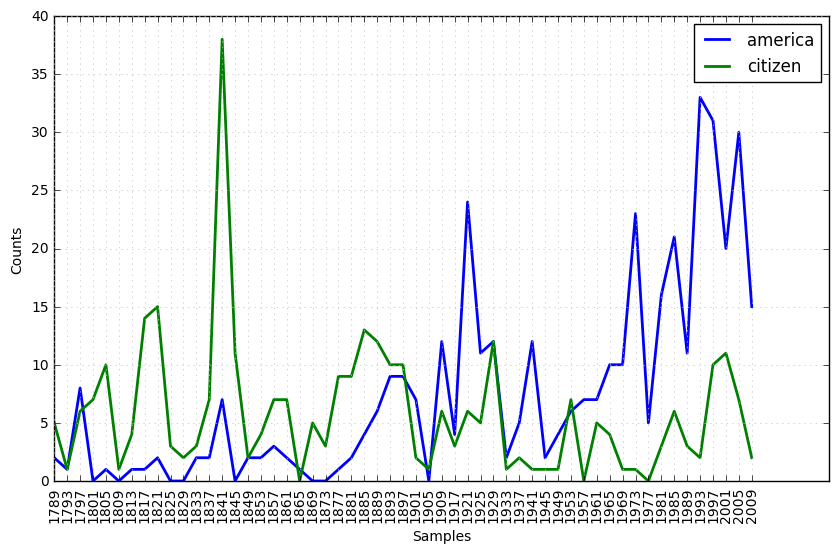

In [28]:
cfd = nltk.ConditionalFreqDist(
        (target, fileid[:4])
        for fileid in inaugural.fileids()
        for w in inaugural.words(fileid)
        for target in ['america', 'citizen']
        if w.lower().startswith(target))
cfd.plot()

## Conditional Frequency Distributions

### Counting Words by Genre

In [29]:
genre_word = [(genre, word)
              for genre in ['news', 'romance']
              for word in brown.words(categories=genre)]
print genre_word[:4]
print genre_word[-4:]

[('news', u'The'), ('news', u'Fulton'), ('news', u'County'), ('news', u'Grand')]
[('romance', u'afraid'), ('romance', u'not'), ('romance', u"''"), ('romance', u'.')]


In [30]:
cfd = nltk.ConditionalFreqDist(genre_word)

In [31]:
cfd.conditions()

['romance', 'news']

### Plotting and Tabulating Distributions

In [32]:
cfd = nltk.ConditionalFreqDist(
        (target, fileid[:4])
        for fileid in inaugural.fileids()
        for w in inaugural.words(fileid)
        for target in ['america', 'citizen']
        if w.lower().startswith(target))

In [33]:
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
        (lang, len(word))
        for lang in languages
        for word in udhr.words(lang + '-Latin1'))

In [34]:
cfd.tabulate(conditions=['English', 'German_Deutsch'], samples=range(10), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


### Generating Random Text with Bigrams

In [35]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
for b in nltk.bigrams(sent):
    print b

('In', 'the')
('the', 'beginning')
('beginning', 'God')
('God', 'created')
('created', 'the')
('the', 'heaven')
('heaven', 'and')
('and', 'the')
('the', 'earth')
('earth', '.')


In [36]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print word,
        word = cfdist[word].max()
        
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

print cfd['living']

generate_model(cfd, 'living')

<FreqDist with 6 samples and 16 outcomes>
living creature that he said , and the land of the land of the land


In [37]:
cfd.conditions()[:5]

[u'alo', u'Leah', u'Night', u'Matred', u'four']

In [38]:
cfd['living']

FreqDist({u',': 1,
          u'.': 1,
          u'creature': 7,
          u'soul': 1,
          u'substance': 2,
          u'thing': 4})

In [39]:
cfd['living']['creature']

7

## Lexical Resources

### Wordlist Corpora

In [40]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

In [41]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:5]

[u'abbeyland', u'abhorred', u'abilities', u'abounded', u'abridgement']

In [42]:
unusual_words(nltk.corpus.nps_chat.words())[:5]

[u'aaaaaaaaaaaaaaaaa', u'aaahhhh', u'abortions', u'abou', u'abourted']

In [43]:
stopwords.words('english')[:5]

[u'i', u'me', u'my', u'myself', u'we']

In [44]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return 1.0 * len(content) / len(text)

In [45]:
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

In [46]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6 and obligatory in w and nltk.FreqDist(w) <= puzzle_letters][:5]

[u'glover', u'gorlin', u'govern', u'grovel', u'ignore']

In [47]:
names.fileids()

[u'female.txt', u'male.txt']

In [48]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names][:5]

[u'Abbey', u'Abbie', u'Abby', u'Addie', u'Adrian']

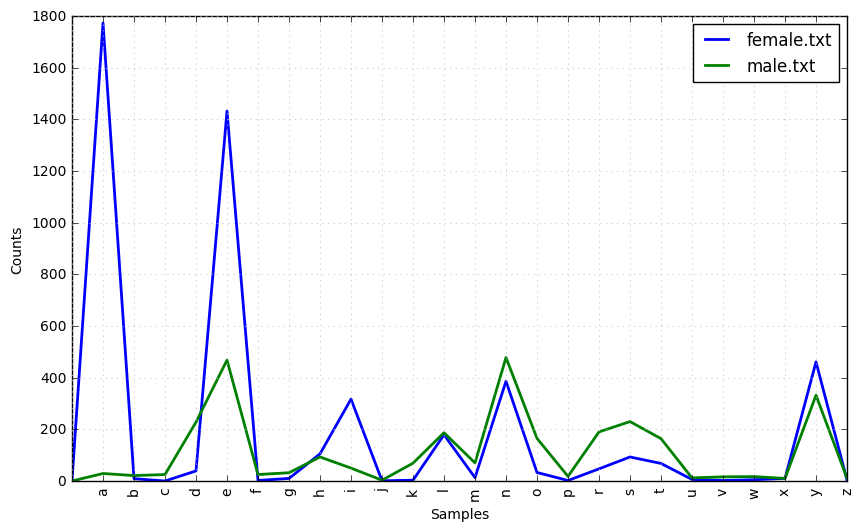

In [49]:
cfd = nltk.ConditionalFreqDist(
        (fileid, name[-1])
        for fileid in names.fileids()
        for name in names.words(fileid))
cfd.plot()

### A Pronouncing dictionary

In [50]:
entries = cmudict.entries()
len(entries)

133737

In [51]:
for entry in entries[39943:39951]:
    print entry

(u'explorer', [u'IH0', u'K', u'S', u'P', u'L', u'AO1', u'R', u'ER0'])
(u'explorers', [u'IH0', u'K', u'S', u'P', u'L', u'AO1', u'R', u'ER0', u'Z'])
(u'explores', [u'IH0', u'K', u'S', u'P', u'L', u'AO1', u'R', u'Z'])
(u'exploring', [u'IH0', u'K', u'S', u'P', u'L', u'AO1', u'R', u'IH0', u'NG'])
(u'explosion', [u'IH0', u'K', u'S', u'P', u'L', u'OW1', u'ZH', u'AH0', u'N'])
(u'explosions', [u'IH0', u'K', u'S', u'P', u'L', u'OW1', u'ZH', u'AH0', u'N', u'Z'])
(u'explosive', [u'IH0', u'K', u'S', u'P', u'L', u'OW1', u'S', u'IH0', u'V'])
(u'explosively', [u'EH2', u'K', u'S', u'P', u'L', u'OW1', u'S', u'IH0', u'V', u'L', u'IY0'])


In [52]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron
        if ph1 == 'P' and ph3 == 'T':
            print word, ph2,

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1


In [53]:
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable][:5]

[u"atlantic's", u'audiotronics', u'avionics', u'beatniks', u'calisthenics']

In [54]:
[w for w, pron in entries if pron[-1] == 'M' and w[-1] == 'n']

[u'autumn', u'column', u'condemn', u'damn', u'goddamn', u'hymn', u'solemn']

In [55]:
sorted(set(w[:2] for w, pron in entries if pron[0] == 'N' and w[0] != 'n'))

[u'gn', u'kn', u'mn', u'pn']

In [56]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']][:5]

[u'abbreviated',
 u'abbreviated',
 u'abbreviating',
 u'accelerated',
 u'accelerating']

In [57]:
[w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']][:5]

[u'abbreviation',
 u'abbreviations',
 u'abomination',
 u'abortifacient',
 u'abortifacients']

In [58]:
p3 = [(pron[0]+'-'+pron[2], word)
          for (word, pron) in entries
          if pron[0] == 'P' and len(pron) == 3]

cfd = nltk.ConditionalFreqDist(p3)

for template in cfd.conditions():
    if len(cfd[template]) > 10:
        words = cfd[template].keys()
        wordlist = ' '.join(words)
        print template, wordlist[:70] + "..."

P-T pot puett pit pete putt pat purt pet peart pott pett pait pert pote pa...
P-P pap paap pipp paup pape pup pep poop pop pipe paape popp pip peep pope...
P-R paar poor par poore pear pare pour peer pore parr por pair porr pier...
P-S pearse piece posts pasts peace perce pos pers pace puss pesce pass pur...
P-Z pays p.s pao's pais paws p.'s pas pez paz pei's pose poise peas paiz p...
P-L pil poehl pille pehl pol pall pohl pahl paul perl pale paille perle po...
P-N paine payne pon pain pin pawn pinn pun pine paign pen pyne pane penn p...
P-K pik peek pic pique paque polk perc poke perk pac pock poch purk pak pa...
P-UW1 plew pshew plue peugh pew pru pugh peru prugh prue prew...
P-CH perch puche poche peach petsche poach pietsch pautsch piche petsch poo...


In [59]:
prondict = nltk.corpus.cmudict.dict()
prondict['fire']

[[u'F', u'AY1', u'ER0'], [u'F', u'AY1', u'R']]

In [60]:
text = ['natural', 'language', 'processing']
print ' '.join([ph for w in text for ph in prondict[w][0]])

N AE1 CH ER0 AH0 L L AE1 NG G W AH0 JH P R AA1 S EH0 S IH0 NG


### Comparative Wordlists

In [61]:
swadesh.fileids()[:5]

[u'be', u'bg', u'bs', u'ca', u'cs']

In [62]:
swadesh.words('en')[:5]

[u'I', u'you (singular), thou', u'he', u'we', u'you (plural)']

In [63]:
fr2en = swadesh.entries(['fr', 'en'])
fr2en[:5]

[(u'je', u'I'),
 (u'tu, vous', u'you (singular), thou'),
 (u'il', u'he'),
 (u'nous', u'we'),
 (u'vous', u'you (plural)')]

In [64]:
translate = dict(fr2en)
translate['chien']

u'dog'

In [65]:
de2en = swadesh.entries(['de', 'en'])
es2en = swadesh.entries(['es', 'en'])
translate.update(dict(de2en))
translate.update(dict(es2en))
translate['Hund']

u'dog'

In [66]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]:
    print swadesh.entries(languages)[i]

(u'say', u'sagen', u'zeggen', u'decir', u'dire', u'dizer', u'dicere')
(u'sing', u'singen', u'zingen', u'cantar', u'chanter', u'cantar', u'canere')
(u'play', u'spielen', u'spelen', u'jugar', u'jouer', u'jogar, brincar', u'ludere')
(u'float', u'schweben', u'zweven', u'flotar', u'flotter', u'flutuar, boiar', u'fluctuare')


### Shoebox and Toolbox Lexicons

In [67]:
toolbox.entries('rotokas.dic')[:1]

[(u'kaa',
  [(u'ps', u'V'),
   (u'pt', u'A'),
   (u'ge', u'gag'),
   (u'tkp', u'nek i pas'),
   (u'dcsv', u'true'),
   (u'vx', u'1'),
   (u'sc', u'???'),
   (u'dt', u'29/Oct/2005'),
   (u'ex', u'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   (u'xp', u'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   (u'xe', u'Apoka is gagging from food while talking.')])]

## WordNet

### Senses and Synonyms

In [68]:
wordnet.synsets('motorcar')

[Synset('car.n.01')]

In [69]:
wordnet.synset('car.n.01').lemma_names()

[u'car', u'auto', u'automobile', u'machine', u'motorcar']

In [70]:
wordnet.synset('car.n.01').definition()

u'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [71]:
wordnet.synset('car.n.01').examples()

[u'he needs a car to get to work']

In [72]:
wordnet.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [73]:
wordnet.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [74]:
wordnet.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [75]:
wordnet.lemma('car.n.01.automobile').name()

u'automobile'

In [76]:
wordnet.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [77]:
for synset in wordnet.synsets('car'):
    print synset.lemma_names()

[u'car', u'auto', u'automobile', u'machine', u'motorcar']
[u'car', u'railcar', u'railway_car', u'railroad_car']
[u'car', u'gondola']
[u'car', u'elevator_car']
[u'cable_car', u'car']


In [78]:
wordnet.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

### The WordNet Hierarchy

In [79]:
motorcar = wordnet.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[26]

Synset('stanley_steamer.n.01')

In [80]:
sorted([lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas()])[:5]

[u'Model_T', u'S.U.V.', u'SUV', u'Stanley_Steamer', u'ambulance']

### More Lexical Relations

In [81]:
wordnet.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [82]:
wordnet.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [83]:
wordnet.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [84]:
for synset in wordnet.synsets('mint', wordnet.NOUN):
    print synset.name() + ':', synset.definition()

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [85]:
wordnet.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [86]:
wordnet.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

In [87]:
wordnet.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [88]:
wordnet.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [89]:
wordnet.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

In [90]:
wordnet.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [91]:
wordnet.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [92]:
wordnet.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('inclined.a.02.inclined'), Lemma('vertical.a.01.vertical')]

In [93]:
wordnet.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

### Semantic Similarity

In [94]:
right = wordnet.synset('right_whale.n.01')
orca = wordnet.synset('orca.n.01')
minke = wordnet.synset('minke_whale.n.01')
tortoise = wordnet.synset('tortoise.n.01')
novel = wordnet.synset('novel.n.01')
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [95]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [96]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [97]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

In [98]:
wordnet.synset('baleen_whale.n.01').min_depth()

14

In [99]:
wordnet.synset('whale.n.02').min_depth()

13

In [100]:
wordnet.synset('vertebrate.n.01').min_depth()

8

In [101]:
wordnet.synset('entity.n.01').min_depth()

0

In [102]:
right.path_similarity(minke)

0.25

In [103]:
right.path_similarity(orca)

0.16666666666666666

In [104]:
right.path_similarity(tortoise)

0.07692307692307693

In [105]:
right.path_similarity(novel)

0.043478260869565216

## Exercises

In [106]:
# Use the corpus module to explore austen-persuasion.txt.
# How many word tokens does this book have?
# How many word types?

ap = gutenberg.words('austen-persuasion.txt')
print len(ap)
print len(set(ap))

98171
6132


In [107]:
# Use the Brown Corpus reader nltk.corpus.brown.words() or
# the Web Text Corpus reader nltk.corpus.webtext.words()
# to access some sample text in two differ- ent genres.

ss = nltk.corpus.brown.sents(categories='humor')
print ' '.join(ss[0])

ss = nltk.corpus.brown.sents(categories='news')
print ' '.join(ss[0])

It was among these that Hinkle identified a photograph of Barco ! !
The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .


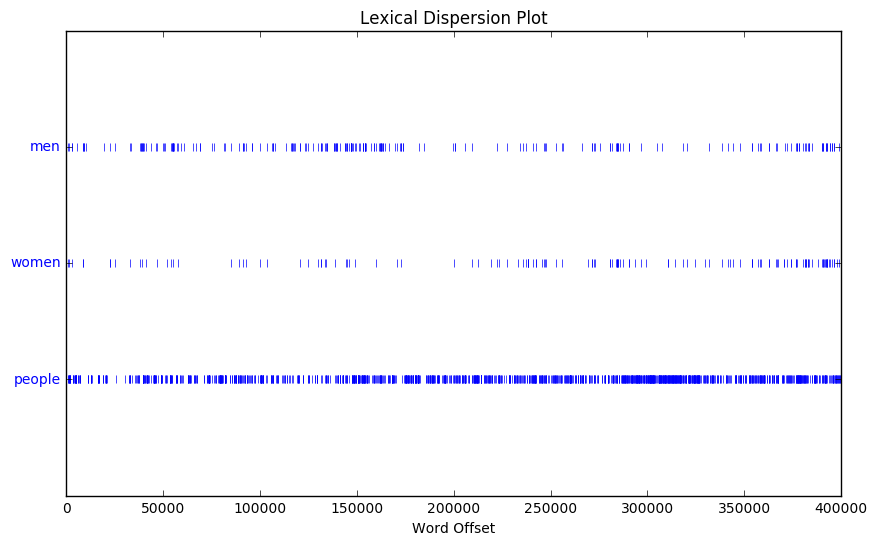

In [108]:
# ReadinthetextsoftheStateoftheUnionaddresses,usingthestate_unioncorpus reader.
# Count occurrences of men, women, and people in each document.
# What has happened to the usage of these words over time?

su = nltk.Text(nltk.corpus.state_union.words())
su.dispersion_plot(['men', 'women', 'people'])

In [109]:
# Investigate the holonym-meronym relations for some nouns.
# Remember that there are three kinds of holonym-meronym relation, so you need to use
# member_meronyms(), part_meronyms(), substance_meronyms(),
# member_holonyms(), part_holonyms(), and substance_holonyms().

print wordnet.synset('forest.n.01').member_meronyms()
print wordnet.synset('person.n.01').part_meronyms()
print wordnet.synset('water.n.01').substance_meronyms()

print wordnet.synset('person.n.01').member_holonyms()
print wordnet.synset('arm.n.01').part_holonyms()
print wordnet.synset('nitrogen.n.01').substance_holonyms()

[Synset('tree.n.01'), Synset('underbrush.n.01')]
[Synset('human_body.n.01'), Synset('personality.n.01')]
[Synset('hydrogen.n.01'), Synset('oxygen.n.01')]
[Synset('people.n.01')]
[Synset('body.n.01'), Synset('homo.n.02')]
[Synset('air.n.01')]


In [110]:
# According to Strunk and White’s Elements of Style, the word however, used
# at the start of a sentence, means “in whatever way” or “to whatever extent,”
# and not “nevertheless.” They give this example of correct usage: However you
# advise him, he will probably do as he thinks best.
# (http://www.bartleby.com/141/strunk3.html)
# Use the concordance tool to study actual usage of this word in the various texts
# we have been considering.
# See also the LanguageLog posting “Fossilized prejudices about ‘however’” at
# http://itre.cis.upenn.edu/~myl/languagelog/archives/001913 .html.

t = nltk.Text(ap)
t.concordance('However', lines=10)

Displaying 10 of 89 matches:
onceited , silly father . She had , however , one very intimate friend , a sens
early custom . But these measures , however good in themselves , were insuffici
ellynch Hall was to be let . This , however , was a profound secret , not to be
t immediate neighbourhood , which , however , had not suited him ; that acciden
e dues of a tenant . It succeeded , however ; and though Sir Walter must ever l
h , the former curate of Monkford , however suspicious appearances may be , but
good character and appearance ; and however Lady Russell might have asked yet f
siness no evil . She was assisted , however , by that perfect indifference and 
h the others . Something occurred , however , to give her a different duty . Ma
 , but can never alter plain ones . However , at any rate , as I have a great d


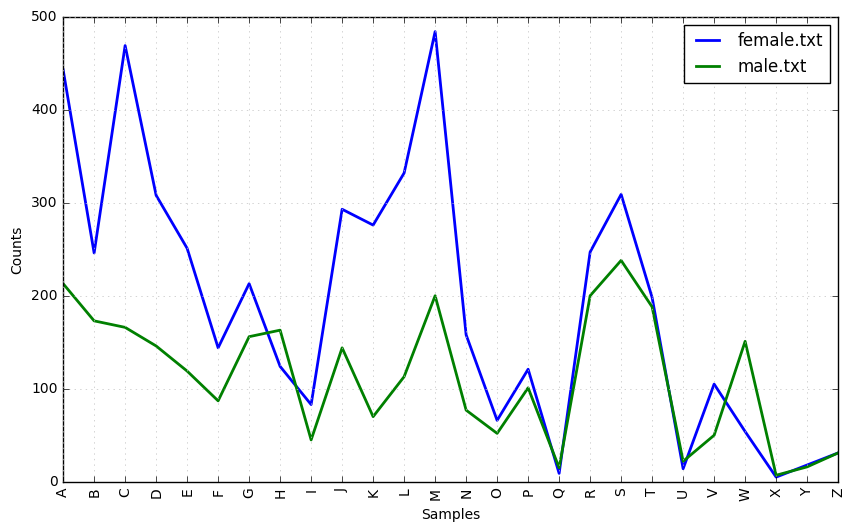

In [111]:
# Define a conditional frequency distribution over the Names Corpus that allows you
# to see which initial letters are more frequent for males versus females

cfd = nltk.ConditionalFreqDist(
        (fileid, name[0])
        for fileid in names.fileids()
        for name in names.words(fileid))
cfd.plot()

In [112]:
# Pick a pair of texts and study the differences between them, in terms of vocabulary,
# vocabulary richness, genre, etc. Can you find pairs of words that have quite different
# meanings across the two texts, such as monstrous in Moby Dick and in Sense and Sensibility?

mdw = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
mdt = nltk.Text(mdw)
asw = nltk.corpus.gutenberg.words('austen-sense.txt')
ast = nltk.Text(asw)

print 1.0 * len(set(mdw)) / len(mdw)
print 1.0 * len(set(asw)) / len(asw)
print

print mdt.similar('monstrous')
print
print ast.similar('monstrous')

0.0740628558502
0.0482638300277

imperial subtly impalpable pitiable curious abundant perilous
trustworthy untoward singular lamentable few determined maddens
horrible tyrannical lazy mystifying christian exasperate
None

very exceedingly so heartily a great good amazingly as sweet
remarkably extremely vast
None


In [113]:
# Investigate the table of modal distributions and look for other patterns.
# Try to explain them in terms of your own impressionistic understanding of
# the different genres. Can you find other closed classes of words that exhibit
# significant differ- ences across different genres?

cfd = nltk.ConditionalFreqDist(
        (genre, word)
        for genre in brown.categories()
        for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['I', 'you', 'he', 'it', 'she', 'we', 'they']
cfd.tabulate(conditions=genres, samples=modals)

                   I  you   he   it  she   we they 
           news  179   55  451  363   42   77  205 
       religion  155  100  137  264   10  176  115 
        hobbies  154  383  155  476   21  100  177 
science_fiction   98   81  139  129   36   30   53 
        romance  951  456  702  573  496   78  168 
          humor  239  131  146  162   58   32   70 


In [114]:
# Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

def top_5_words(ws):
    stopwords = nltk.corpus.stopwords.words('english')
    fd = nltk.FreqDist([w for w in ws if w.lower() not in stopwords and w.isalpha()])
    return fd.most_common(5)

print top_5_words(mdw)
print top_5_words(asw)

[(u'whale', 906), (u'one', 889), (u'like', 624), (u'upon', 538), (u'man', 508)]
[(u'Elinor', 684), (u'could', 568), (u'Marianne', 566), (u'Mrs', 530), (u'would', 507)]


(200, 30000)

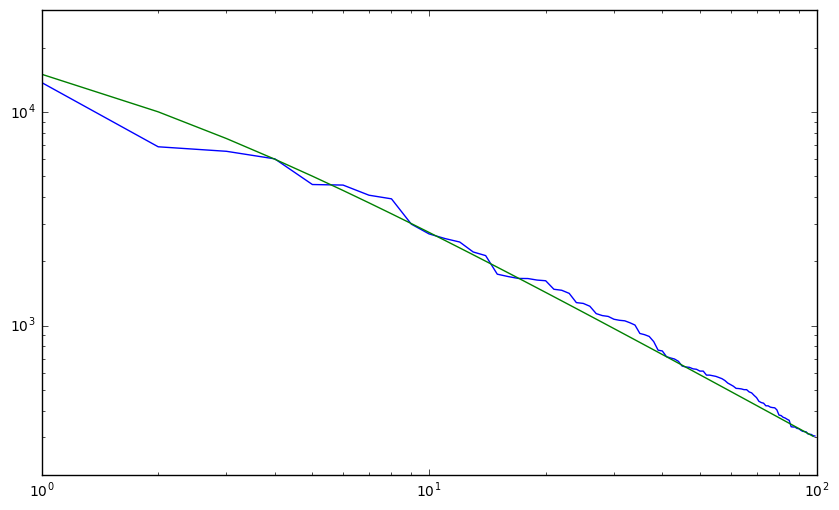

In [115]:
# Write a function to process a large text and plot word frequency against word
# rank using pylab.plot. Do you confirm Zipf’s law? (Hint: it helps to use a logarithmic scale.)
# What is going on at the extreme ends of the plotted line?

fd = nltk.FreqDist(mdw)
top_100_freqs = [f[1] for f in fd.most_common(100)]

plt.plot(top_100_freqs)

xs = []
for i in range(1, 100):
    xs.append(30000.0 / i)
plt.plot(xs)

plt.loglog()
plt.ylim((200, 30000))


In [117]:
# Store the n most likely words in a list words, then randomly
# choose a word from the list using random.choice().

def generate_model(cfdist, word, num=20):
    for i in range(num):
        print word,
        word = random.choice([f[0] for f in cfdist[word].most_common(10)])
        
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

generate_model(cfd, 'living')

living thing is this , behold this that thou goest toward Assyr and the sons carried Jacob went up after
